### API for coordinates

In [2]:
import requests
import numpy as np
import pandas as pd
import json
import geopandas as gpd
import rioxarray
import rasterio
from rasterio import mask
import geojson
import matplotlib as plt
from matplotlib import pyplot as plt
import geopandas
from shapely.geometry import box
import georasters as gr
from osgeo import gdal
%matplotlib inline

In [3]:
address = "Dreveneind 1, 2910 Essen" 

In [4]:
def get_coordinates(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
    return info['polygon'][0]['coordinates'][0] 

In [5]:
polygon = get_coordinates(address)
polygon

[[159362.70088172704, 239936.7117844522],
 [159351.41384171695, 239941.70557645336],
 [159347.94644971192, 239934.70359244943],
 [159342.96244971454, 239937.03754445165],
 [159338.10510570556, 239926.8673684448],
 [159341.3973937109, 239925.33898444474],
 [159341.5757617131, 239925.69533644244],
 [159342.15035370737, 239925.4817044437],
 [159343.78683371097, 239924.87306444347],
 [159345.2128817141, 239928.08138444647],
 [159343.59444971383, 239928.81956044585],
 [159343.1514417082, 239929.02167244628],
 [159344.22536171228, 239931.28880844638],
 [159344.5845297128, 239931.10794444755],
 [159346.35835371166, 239930.21488844603],
 [159346.8604977131, 239931.15453644842],
 [159347.06555371732, 239931.53828044608],
 [159358.13678572327, 239926.30180044472],
 [159362.70088172704, 239936.7117844522]]

In [6]:
from shapely.geometry import Polygon

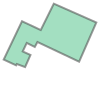

In [7]:
polygon_shapely = Polygon(polygon)
polygon_shapely

In [8]:
x_polygon = [x[0] for x in polygon]
y_polygon = [x[1] for x in polygon]

x_left = min(x_polygon)
x_right = max(x_polygon)
y_bottom = min(y_polygon)
y_top = max(y_polygon)

(x_left, x_right, y_bottom, y_top)

(159338.10510570556,
 159362.70088172704,
 239924.87306444347,
 239941.70557645336)

In [9]:
import shapefile

In [10]:
write = shapefile.Writer("shapefiles/test/polygon")
write.field("name", "C")

write.poly([polygon])
write.record("polygon_1")

write.close()

In [11]:
pwd

'/home/becode/3D-House/3D-House-Project'

In [12]:
polygon[0]

[159362.70088172704, 239936.7117844522]

<AxesSubplot:>

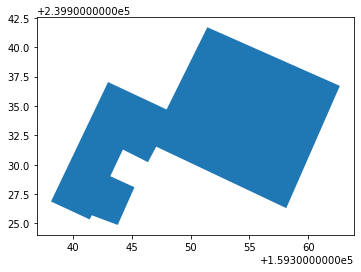

In [13]:
# Read test file

path = "/home/becode/3D-House/3D-House-Project/shapefiles/test/polygon.shp"
test = gpd.read_file(path)
test.plot()

In [14]:
geometries = [{"Type": "Polygon", "Coordinate Points": polygon}]
xds = rioxarray.open_rasterio(
    "Data/DSM/DSM-1/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", masked = True).rio.clip(geometries, from_disk=True)
xds.plot()

ValueError: geometry must be a GeoJSON-like geometry, GeometryCollection, or FeatureCollection